In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [28]:
# Step 1: Load the Dataset
dataset_path = 'online_shoppers_intention 2.csv'
df = pd.read_csv(dataset_path)

In [29]:
df.shape

(12330, 18)

In [30]:
print(df["Month"].value_counts())

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


In [31]:
# Step 2: Data Cleaning
# Checking for missing values
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [32]:
# Handling missing values (if any)
df = df.dropna()

In [33]:
# Step 3: Data Analysis
# Displaying the column names
print(df.columns)



Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [34]:
# Displaying summary statistics
print(df.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

In [35]:
# Checking the data types of each column
print(df.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [36]:
df["VisitorType"].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

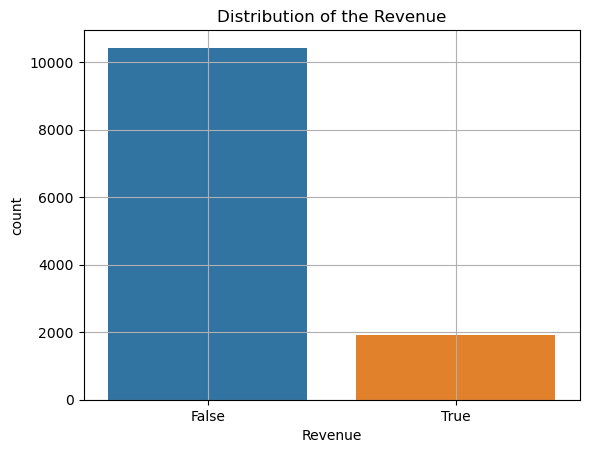

In [37]:
# Step 4: Data Visualization
# Visualizing the distribution of the target variable
sns.countplot(x='Revenue', data=df)
plt.title('Distribution of the Revenue')
plt.grid()
plt.show()

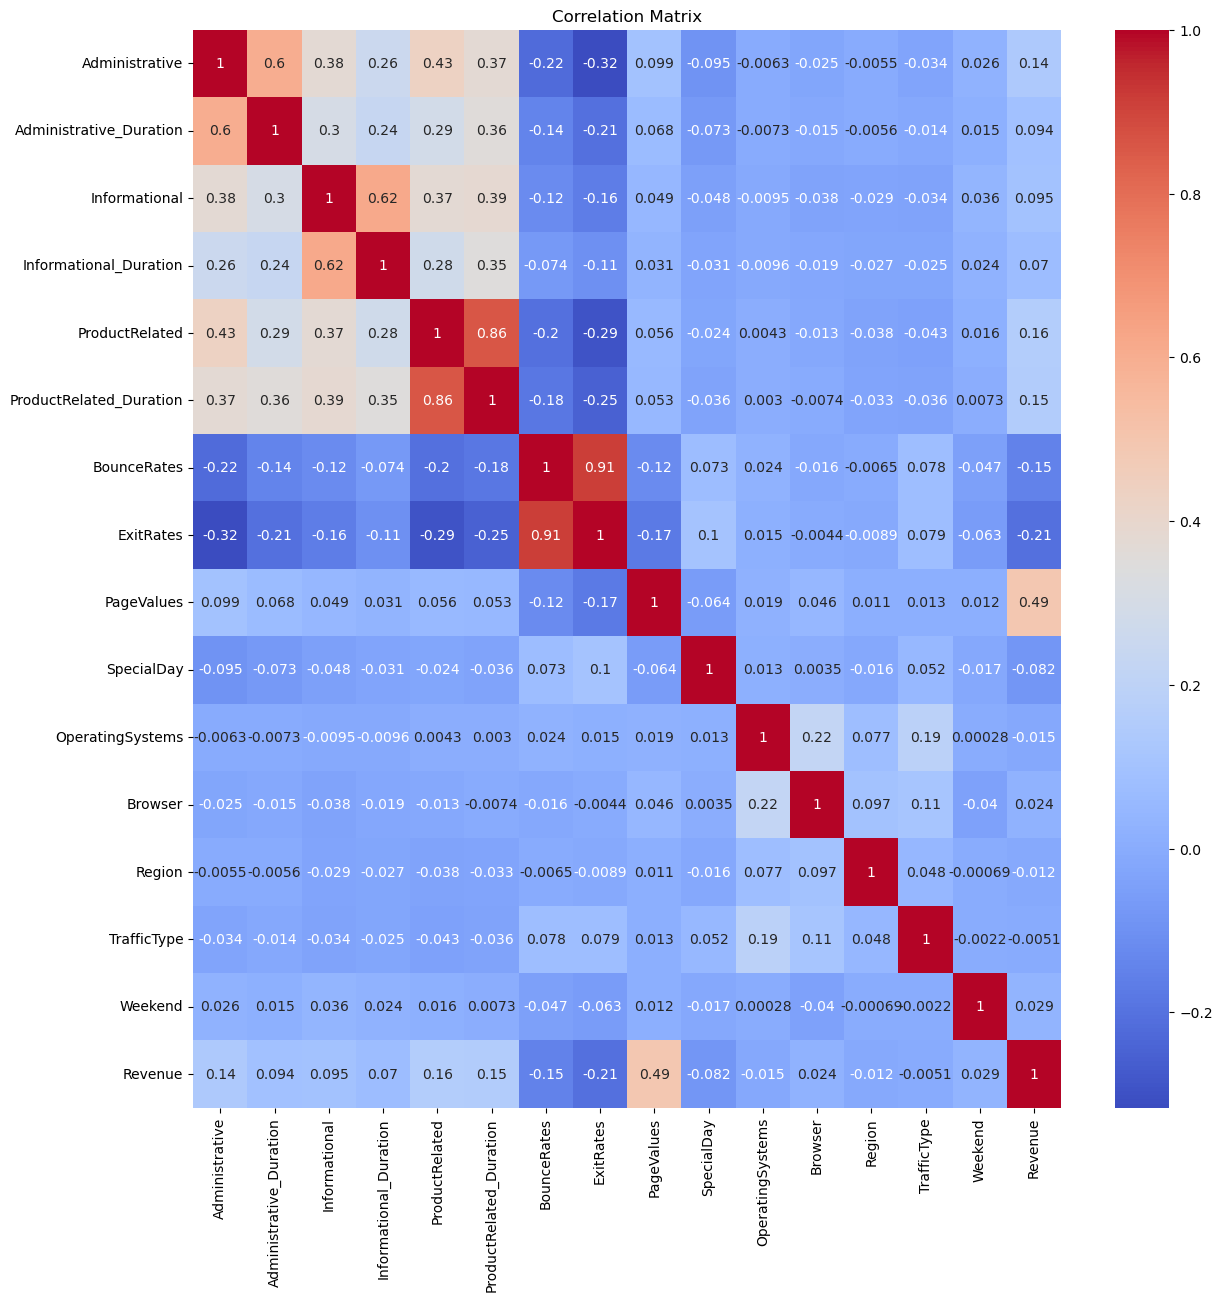

In [38]:
# Visualizing the correlation between variables
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [39]:
# converting categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df)

In [40]:
# splitting dataset into features (X) and target variable (y)
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [41]:
# Splitting  Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Scaling the Input Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Applying Classification Algorithms
# Using Generalized Logistic Regression
lr_model = LogisticRegression(max_iter=1000)  # Increase max_iter
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)

In [44]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score

# Confusion matrix

confusion_mat = confusion_matrix(y_test, lr_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Accuracy 
print("Logistic Regression Accuracy:", lr_accuracy)

# F1 score
f1 = f1_score(y_test, lr_pred)
print("F1 Score:", f1)

# Recall
recall = recall_score(y_test, lr_pred)
print("Recall:", recall)

# Precision
precision = precision_score(y_test, lr_pred)
print("Precision:", precision)

Confusion Matrix:
[[2008   47]
 [ 266  145]]
Logistic Regression Accuracy: 0.8730738037307381
F1 Score: 0.4809286898839138
Recall: 0.35279805352798055
Precision: 0.7552083333333334


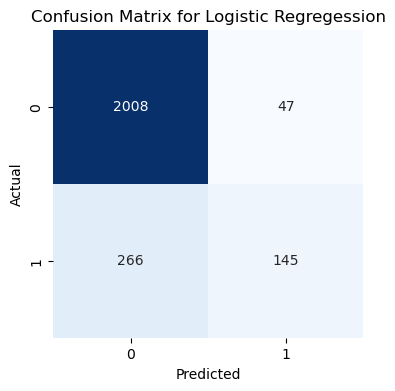

In [45]:
# Create labels for the confusion matrix
labels = np.unique(y_test)
categories = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Logistic Regregession")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [46]:
# Using Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

In [47]:
# Confusion matrix
confusion_mat = confusion_matrix(y_test, dt_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Accuracy 
print("Decision Tree Accuracy:", dt_accuracy)

# F1 score
f1 = f1_score(y_test, dt_pred)
print("F1 Score:", f1)

# Recall
recall = recall_score(y_test, dt_pred)
print("Recall:", recall)

# Precision
precision = precision_score(y_test, dt_pred)
print("Precision:", precision)

Confusion Matrix:
[[1875  180]
 [ 172  239]]
Decision Tree Accuracy: 0.8572587185725872
F1 Score: 0.5759036144578312
Recall: 0.5815085158150851
Precision: 0.5704057279236276


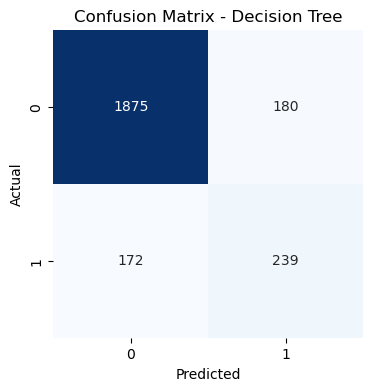

In [48]:
labels = np.unique(y_test)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
# Using Support Vector Machines
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_accuracy_percentage = svm_accuracy * 100

print("Support Vector Machines Accuracy: {:.2f}%".format(svm_accuracy_percentage))

Support Vector Machines Accuracy: 87.88%


In [50]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test, svm_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Acuracy
print("Support Vector Machines Accuracy:", svm_accuracy)

# F1 score
f1 = f1_score(y_test, svm_pred)
print("F1 Score:", f1)

# Recall
recall = recall_score(y_test, svm_pred)
print("Recall:", recall)

# Precision
precision = precision_score(y_test, svm_pred)
print("Precision:", precision)

Confusion Matrix:
[[1994   61]
 [ 238  173]]
Support Vector Machines Accuracy: 0.8787510137875101
F1 Score: 0.5364341085271317
Recall: 0.4209245742092457
Precision: 0.7393162393162394


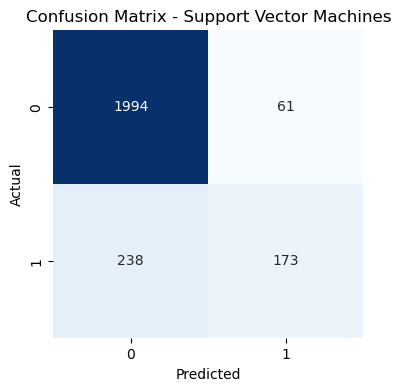

In [51]:
labels = np.unique(y_test)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Support Vector Machines')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

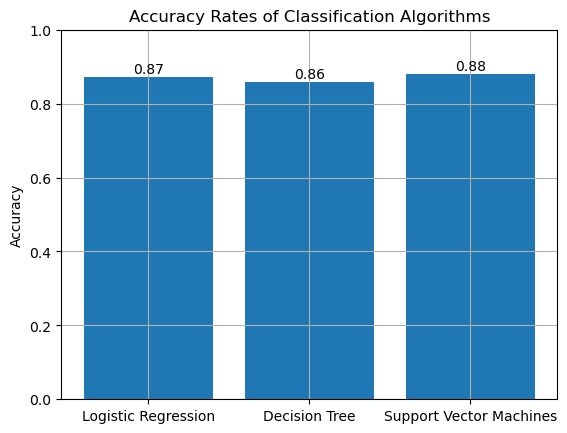

In [52]:
# Creating a bar plot of accuracy rates
labels = ['Logistic Regression', 'Decision Tree', 'Support Vector Machines']
accuracies = [lr_accuracy, dt_accuracy, svm_accuracy]

x = np.arange(len(labels))
plt.bar(x, accuracies)
plt.xticks(x, labels)
plt.ylim([0, 1])  # Setting y-axis limits between 0 and 1
plt.ylabel('Accuracy')
plt.title('Accuracy Rates of Classification Algorithms')
plt.grid()

# Adding accuracy values as text labels on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center')

# Displaying the bar plot
plt.show()